In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Paso 1: Cargar bibliotecas

In [2]:
# Importar las librerías necesarias
import pandas as pd   # Para manipulación y análisis de datos
import numpy as np    # Para operaciones numéricas
import matplotlib.pyplot as plt # Para visualización básica de datos
import matplotlib.ticker as mticker # Para visualización básica de datos
import seaborn as sns  # Para visualización de datos mejorada
from sklearn.preprocessing import LabelEncoder # Para codificación de variables categóricas
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Para dividir los datos en entrenamiento y prueba
from sklearn.neighbors import KNeighborsClassifier # Clasificador KNN
from sklearn.ensemble import RandomForestClassifier # Clasificador Random Forest
from sklearn.linear_model import LogisticRegression # Clasificador de Regresión Logística
from sklearn.tree import DecisionTreeClassifier # Clasificador de Árbol de Decisión
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix # Para evaluación de modelos
from sklearn.metrics import roc_curve, auc # Para graficar la curva ROC


# Paso 2: Cargar el dataset

In [3]:
dataFrame = pd.read_csv('/content/drive/MyDrive/Transactions Data.csv')

In [4]:
#Columnas en el dataframe
dataFrame.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Paso 3: Explorar el conjunto de datos
Antes de construir el modelo, necesitamos explorar el conjunto de datos para entender los datos, su estructura y las relaciones entre las características. Podemos usar varios métodos de pandas como head(), info(), describe() y shape para obtener información básica sobre el conjunto de datos.

In [5]:
# Ver las primeras 5 filas del conjunto de datos
dataFrame.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
# Ver las ultimas 5 filas del conjunto de datos
dataFrame.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
# Ver la información del dataset
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
# Ver las estadísticas del dataset
dataFrame.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Paso 4: Limpieza y preprocesamiento de datos
En este paso, vamos a limpiar y procesar el conjunto manejando los valores ausentes, removiendo duplicados y convirtiendo variables categoricas a numericas.


In [9]:
# Checkear valores ausentes
dataFrame.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
#Checkear nuevamente los tipos de datos que hay
dataFrame.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
print('El numero de duplicados es : ', dataFrame.duplicated().sum())

El numero de duplicados es :  0


# Paso 5 : Analisis de datos exploratorio

El análisis EDA nos ayuda a entender la distribución de los datos, relaciones entre caracteristicas y los importantes insights que pueden ayudarnos a entender el conjunto de datos de manera clara. Usaremos varios graficos para visualizar el dataset


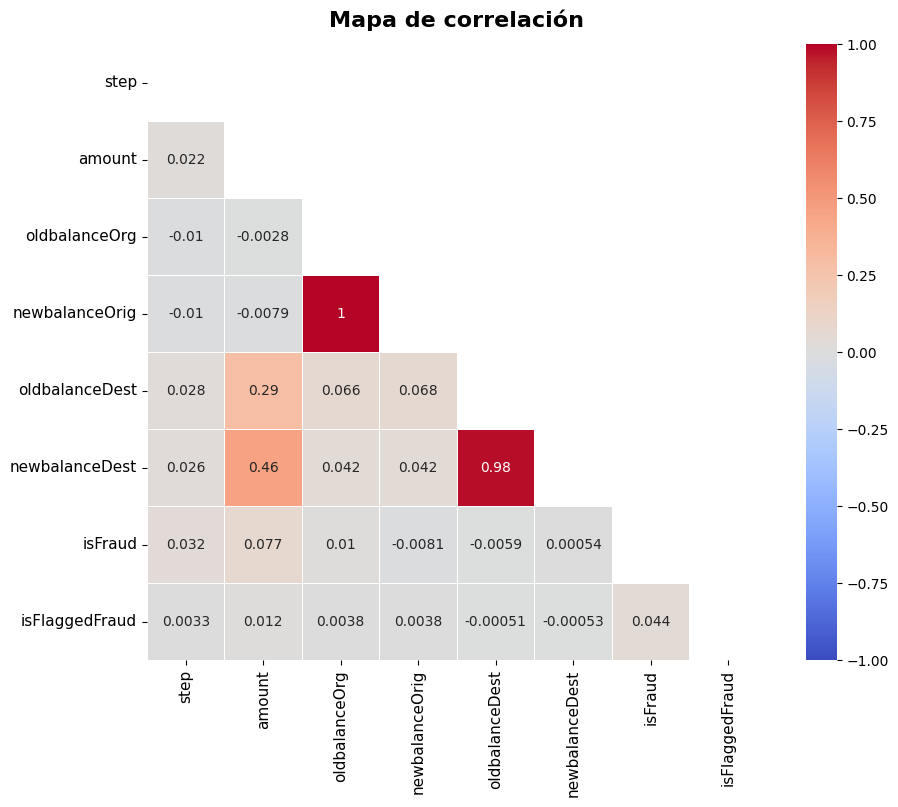

In [12]:
data_h = dataFrame[['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(data_h.corr(numeric_only=True), dtype=np.bool_))
heatmap = sns.heatmap(data_h.corr(numeric_only=True),
                      mask=mask,
                      vmin=-1,
                      vmax=1,
                      center=0,
                      annot=True,
                      cmap="coolwarm",  # You can change the colormap if needed
                      linewidths=.5)
heatmap.set_title('Mapa de correlación', pad=12, fontsize=16, fontweight='bold')
heatmap.tick_params(axis='both', labelsize=11)
plt.show()

Esta es una matriz de correlación que muestra los coeficientes de correlación entre diferentes pares de variables del conjunto de datos.

El coeficiente de correlación es una medida estadística que describe hasta qué punto dos variables cambian juntas. Los valores van de -1 a 1, donde:

1 indica una correlación positiva perfecta (a medida que una variable aumenta, la otra también aumenta).
-1 indica una correlación negativa perfecta (a medida que una variable aumenta, la otra disminuye).
0 indica ninguna correlación.

Aquí hay una interpretación de la matriz de correlación dada:

**Step:**

Correlación positiva débil con newbalanceDest (0.027665) y isFraud (0.031578).
Correlación negativa débil con oldbalanceOrg (-0.010058), newbalanceOrig (-0.010299) y oldbalanceDest (0.027665).

**Amount:**

Correlación positiva moderada con oldbalanceDest (0.294137) y newbalanceDest (0.459304).
Correlación positiva débil con isFraud (0.076688).

**OldbalanceOrg:**

Correlación negativa muy débil con oldbalanceDest (0.066243) y newbalanceDest (0.042029).
Correlación positiva muy débil con isFraud (0.010154).

**NewbalanceOrig:**

Correlación negativa muy débil con oldbalanceDest (0.067812) y newbalanceDest (0.041837).
Correlación negativa muy débil con isFraud (-0.008148).

**OldbalanceDest:**

Correlación positiva fuerte con newbalanceDest (0.976569).
Correlación positiva muy débil con isFlaggedFraud (-0.000513).

**NewbalanceDest:**

Correlación positiva fuerte con oldbalanceDest (0.976569).
Correlación negativa muy débil con isFlaggedFraud (-0.000529).

**IsFraud:**

Correlación positiva débil con amount (0.076688) y newbalanceOrig (-0.008148).
Correlación positiva muy débil con otras variables.

**IsFlaggedFraud:**

Correlación positiva débil con amount (0.012295).
Correlación positiva muy débil con otras variables.

In [13]:
#Matrix de correlación
data_h.corr(numeric_only=True)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


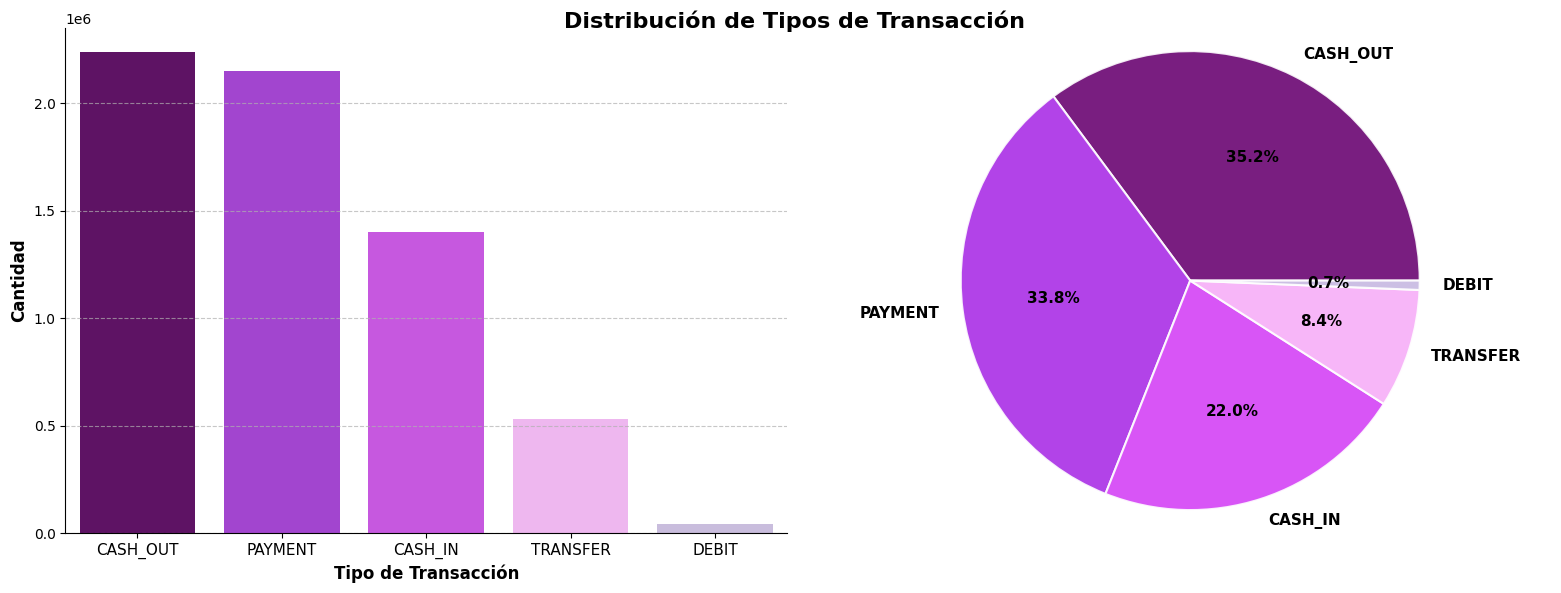

In [18]:
# Contar el número de cada tipo de transacción
conteo_tipos_transaccion = dataFrame['type'].value_counts()

# Configurar la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
colores_morados = ['#6a0572', '#aa2ee6', '#d442f5', '#f7aef8', '#c7b8e2']
sns.barplot(x=conteo_tipos_transaccion.index, y=conteo_tipos_transaccion.values, hue=conteo_tipos_transaccion.index, ax=ax1, palette=colores_morados, legend=False)
ax1.set_xlabel('Tipo de Transacción', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cantidad', fontsize=12, fontweight='bold')

# Ajustar las ubicaciones de los ticks
ax1.set_xticks(range(len(conteo_tipos_transaccion.index)))
# Ajustar las etiquetas de los ticks
ax1.set_xticklabels(conteo_tipos_transaccion.index, fontsize=11)

ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
sns.despine(ax=ax1)

# Gráfico de torta
colores_torta = ['#6a0572', '#aa2ee6', '#d442f5', '#f7aef8', '#c7b8e2']
porciones, textos, porcentajes_automaticos = ax2.pie(conteo_tipos_transaccion, labels=conteo_tipos_transaccion.index, autopct='%1.1f%%', colors=colores_torta, startangle=0, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})
ax2.axis('equal')

# Embellecer las etiquetas del gráfico de torta
for texto in textos:
    texto.set_fontsize(11)
    texto.set_fontweight('bold')

for porcentaje_automatico in porcentajes_automaticos:
    porcentaje_automatico.set_fontsize(11)
    porcentaje_automatico.set_fontweight('bold')

# Agregar sombra al gráfico de torta
for porcion in porciones:
    porcion.set_edgecolor('white')
    porcion.set_linewidth(1.5)
    porcion.set_alpha(0.9)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Establecer un título único para toda la figura
fig.suptitle('Distribución de Tipos de Transacción', fontsize=16, fontweight='bold')
plt.show()





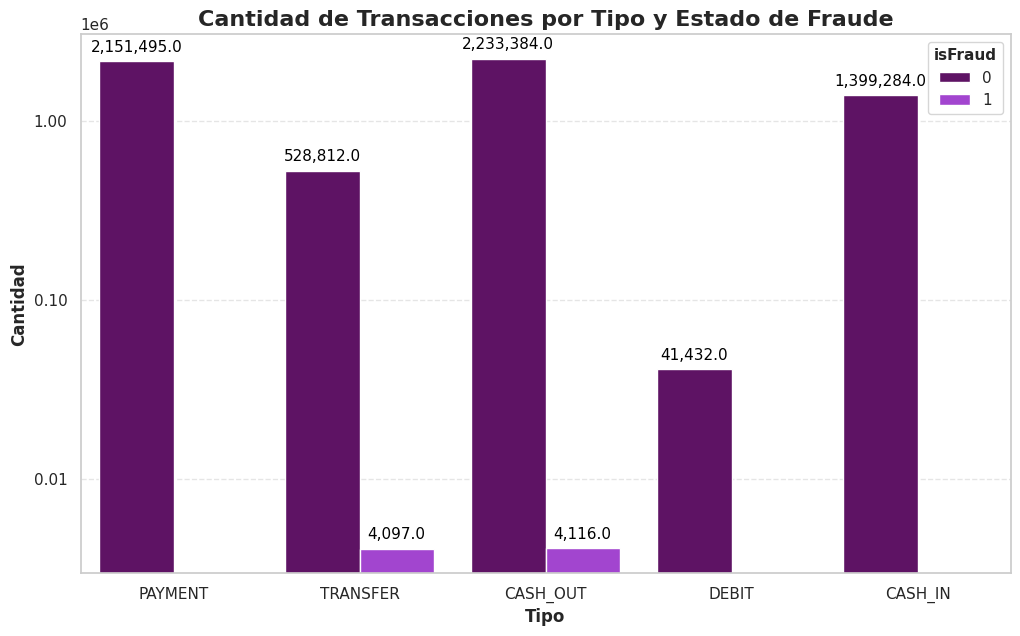

In [ ]:
# Establecer el estilo y contexto
sns.set_style('whitegrid')
sns.set_context('notebook')

# Crear una figura y ejes
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=dataFrame, x='type', hue='isFraud', palette=['#6a0572', '#aa2ee6'])

# Establecer etiquetas y título
ax.set_xlabel('Tipo', fontsize=12, fontweight='bold')
ax.set_ylabel('Cantidad', fontsize=12, fontweight='bold')
ax.set_yscale('log')
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
plt.title('Cantidad de Transacciones por Tipo y Estado de Fraude', fontsize=16, fontweight='bold')

# Embellecer la leyenda
leyenda = ax.legend(title='isFraud', title_fontsize='11', loc='upper right')
leyenda.get_title().set_fontweight('bold')

# Embellecer las marcas y la cuadrícula
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Agregar etiquetas de valor encima de cada barra
for p in ax.patches:
    ax.annotate(f"{p.get_height():,}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=11, color='black', xytext=(0, 10), textcoords='offset points')

# Agregar una cuadrícula de fondo sutil para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


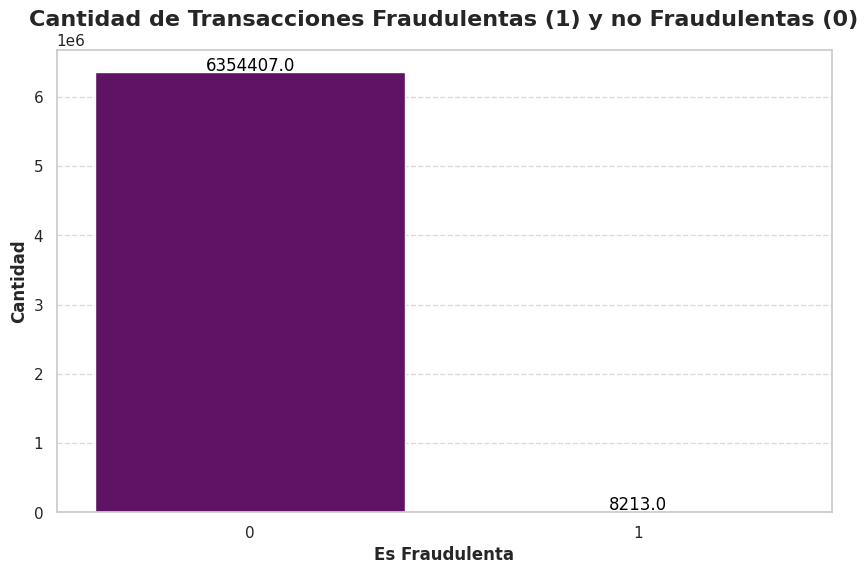

In [ ]:
plt.figure(figsize=(10, 6))

# Crear el gráfico de conteo
grafico_conteo = sns.countplot(x='isFraud', data=dataFrame, hue='isFraud', palette=['#6a0572', '#aa2ee6'], legend=False)

# Establecer etiquetas y título
grafico_conteo.set_title('Cantidad de Transacciones Fraudulentas (1) y no Fraudulentas (0)', fontsize=16, fontweight='bold')
grafico_conteo.set_xlabel('Es Fraudulenta', fontsize=12, fontweight='bold')
grafico_conteo.set_ylabel('Cantidad', fontsize=12, fontweight='bold')

# Embellecer las marcas y la cuadrícula
grafico_conteo.tick_params(axis='both', labelsize=11)
grafico_conteo.yaxis.grid(True, linestyle='--', alpha=0.7)

# Agregar etiquetas de datos
for p in grafico_conteo.patches:
    grafico_conteo.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()



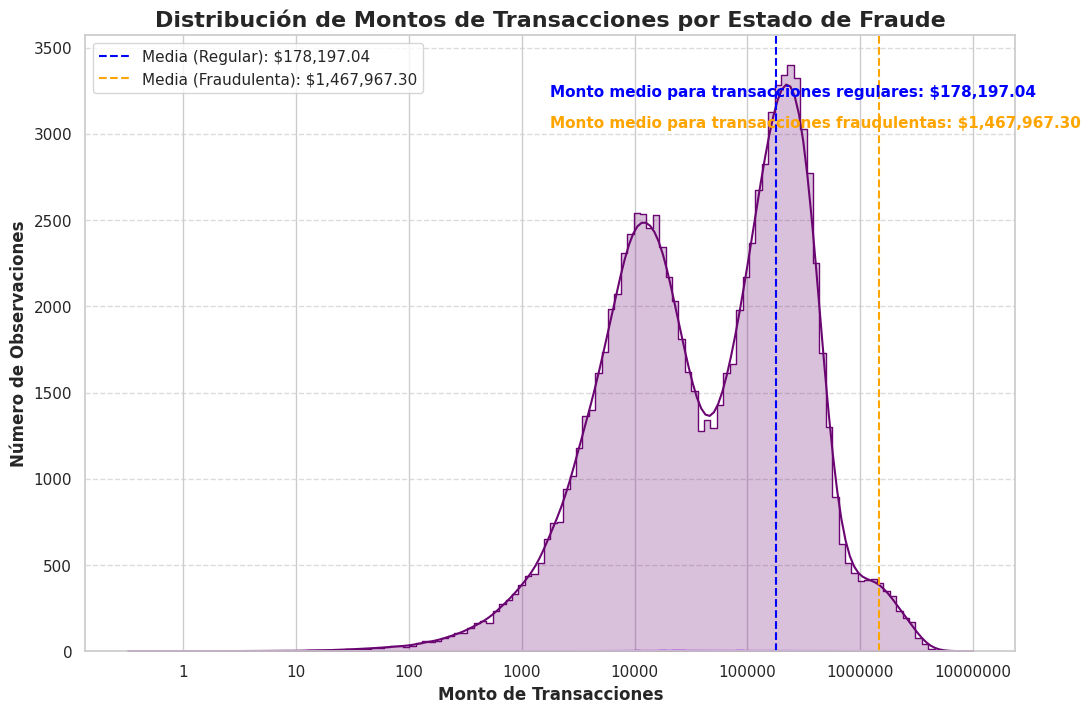

In [ ]:
plt.figure(figsize=(12, 8))

# Crear el gráfico de histograma
histplot = sns.histplot(data=dataFrame[:100000],
                        x='amount',
                        hue='isFraud',
                        kde=True,
                        element='step',
                        palette=['#6a0572', '#aa2ee6'],
                        log_scale=True)

# Establecer etiquetas y título
histplot.set_ylabel('Número de Observaciones', fontsize=12, fontweight='bold')
histplot.set_xlabel('Monto de Transacciones', fontsize=12, fontweight='bold')
plt.title('Distribución de Montos de Transacciones por Estado de Fraude', fontsize=16, fontweight='bold')

# Agregar líneas verticales para los valores medios
mean_value_f = dataFrame[dataFrame['isFraud'] == False]['amount'].mean()
mean_value_t = dataFrame[dataFrame['isFraud'] == True]['amount'].mean()
histplot.axvline(x=mean_value_f, color='blue', linestyle='--', label=f'Media (Regular): ${mean_value_f:,.2f}')
histplot.axvline(x=mean_value_t, color='orange', linestyle='--', label=f'Media (Fraudulenta): ${mean_value_t:,.2f}')

# Agregar anotaciones para los valores medios
histplot.annotate(f'Monto medio para transacciones regulares: ${mean_value_f:,.2f}',
                  xy=(0.5, 0.9),
                  xycoords='axes fraction',
                  fontsize=11, fontweight='bold', color='blue')
histplot.annotate(f'Monto medio para transacciones fraudulentas: ${mean_value_t:,.2f}',
                  xy=(0.5, 0.85),
                  xycoords='axes fraction',
                  fontsize=11, fontweight='bold', color='orange')
histplot.xaxis.set_major_formatter(mticker.ScalarFormatter())
histplot.ticklabel_format(style='plain', axis='x')
histplot.tick_params(axis='both', labelsize=11)
histplot.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


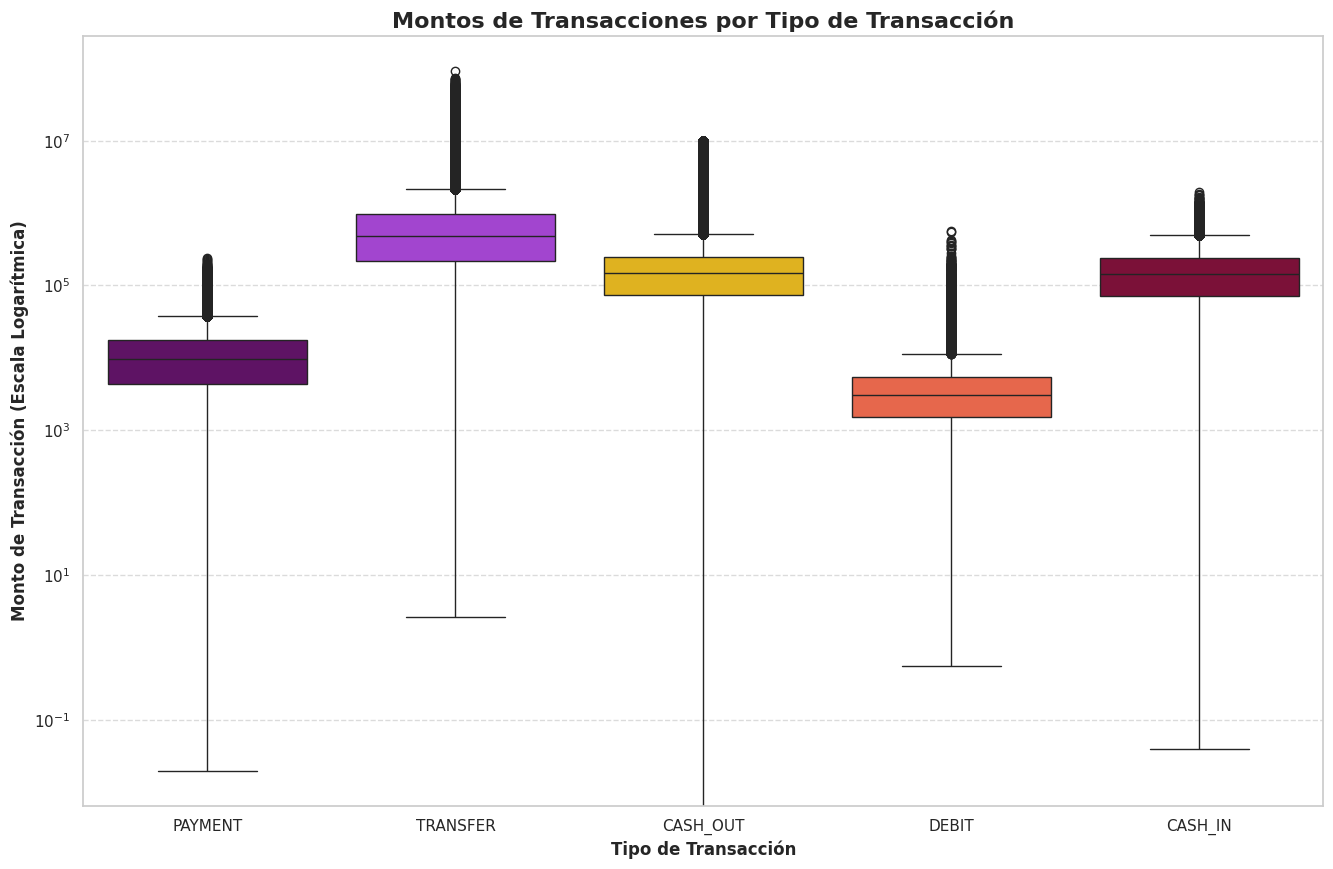

In [ ]:
plt.figure(figsize=(16, 10))
boxplot = sns.boxplot(x='type', y='amount', data=dataFrame, hue='type', palette=['#6a0572', '#aa2ee6', '#FFC300', '#FF5733', '#8C0034'], legend=False)
boxplot.set_title('Montos de Transacciones por Tipo de Transacción', fontsize=16, fontweight='bold')
boxplot.set_xlabel('Tipo de Transacción', fontsize=12, fontweight='bold')
boxplot.set_ylabel('Monto de Transacción (Escala Logarítmica)', fontsize=12, fontweight='bold')
boxplot.set_yscale('log')
boxplot.tick_params(axis='both', labelsize=11)
boxplot.yaxis.grid(True, linestyle='--', alpha=0.7)
plt.show()



# Paso 6 : Ingenieria de caracteristicas



Los valores de los parámetros de las columnas se categorizan en el conjunto de datos numérico para obtener la mejor actualidad para el entrenamiento del modelo.

In [ ]:
#Tipos de datos y atributos
dataFrame.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
# Codificar los objetos de cadena a valores categóricos a valores numéricos
codificador = {}
for i in dataFrame.select_dtypes('object').columns:
    codificador[i] = LabelEncoder()
    dataFrame[i] = codificador[i].fit_transform(dataFrame[i])


In [ ]:
x = dataFrame.drop(columns=['isFraud'])
y = dataFrame['isFraud']

In [ ]:
#Escalar el conjunto de datos
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Paso 7. División de los datos de entrenamiento y prueba en las características dependientes e independientes, con el 80% de los datos de entrenamiento y el 20% de los datos para prueba.





*italicized text*

In [ ]:
# Dividir los datos en características (X) y etiquetas (y)
X = dataFrame[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'isFlaggedFraud']]
y = dataFrame['isFraud']


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
print('Forma de las características de entrenamiento:', X_train.shape)
print('Forma de las etiquetas de entrenamiento:', y_train.shape)
print('Forma de las características de prueba:', X_test.shape)
print('Forma de las etiquetas de prueba:', y_test.shape)


Forma de las características de entrenamiento: (5090096, 8)
Forma de las etiquetas de entrenamiento: (5090096,)
Forma de las características de prueba: (1272524, 8)
Forma de las etiquetas de prueba: (1272524,)


# Paso 8. Inicialización y entrenamiento del modelo
Aquí se inicializa y entrena el modelo con la evaluación del modelo para todos los modelos de aprendizaje automático.

## K-Nearest Neighbors Classifier

In [ ]:
# Inicializar y entrenar uno de los modelos de K-Nearest Neighbors para la clasificación de transacciones fraudulentas
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Predecir el modelo y clasificar los resultados en los datos de prueba
knn_predictions = knn_classifier.predict(X_test)


In [ ]:
# Calcular la precisión para el modelo KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Precisión para el modelo de K-Nearest Neighbors: {:.2f}%".format(knn_accuracy * 100))


Precisión para el modelo de K-Nearest Neighbors: 99.92%


In [ ]:
#Reporte de clasificación
print("Classification Report For KNN Model:\n ",classification_report(y_test,knn_predictions))

Classification Report For KNN Model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.81      0.54      0.65      1641

    accuracy                           1.00   1272524
   macro avg       0.90      0.77      0.82   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
#Matrix de confusion de K-Nearest Neighbors Model
knn_confusion_matrix=confusion_matrix(y_test,knn_predictions)

Decision Tree Classifier

In [ ]:
# Inicializar y entrenar uno de los modelos de árbol de decisiones para la clasificación de transacciones fraudulentas
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Predecir el modelo y clasificar los resultados en los datos de prueba
dt_predictions = dt_classifier.predict(X_test)


In [ ]:
# Calcular la precisión para el modelo de árbol de decisiones
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Precisión para el modelo de árbol de decisiones: {:.2f}%".format(dt_accuracy * 100))


Precisión para el modelo de árbol de decisiones: 99.96%


In [ ]:
#Reporte de clasificación
print("Classification Report For Decision Tree Model:\n ",classification_report(y_test,dt_predictions))

Classification Report For Decision Tree Model:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.87      0.86      0.86      1641

    accuracy                           1.00   1272524
   macro avg       0.93      0.93      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
# Matriz de confusión del modelo de árbol de decisiones
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)


In [ ]:
# Inicializar y entrenar uno de los modelos de regresión logística para la clasificación de transacciones fraudulentas
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predict the model and classify the results on the test data
logistic_regression_predictions = logistic_regression_model.predict(X_test)

In [ ]:
# Calcular la precisión del modelo de Regresión Logística
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
print("Precisión del Modelo de Regresión Logística: {:.2f}%".format(logistic_regression_accuracy * 100))


Precisión del Modelo de Regresión Logística: 99.89%


In [ ]:
# Reporte de clasificación
print("Reporte de Clasificación para el Modelo de Regresión Logística:\n", classification_report(y_test, logistic_regression_predictions))


Reporte de Clasificación para el Modelo de Regresión Logística:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.62      0.36      0.46      1641

    accuracy                           1.00   1272524
   macro avg       0.81      0.68      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
# Matriz de confusión del Modelo de Regresión Logística
logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_predictions)


In [ ]:
# Inicializar y entrenar uno de los Modelos de Bosque Aleatorio para la Clasificación de Transacciones Fraudulentas
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Predecir el modelo y clasificar los resultados en los datos de prueba
random_forest_predictions = random_forest_model.predict(X_test)


In [ ]:
# Calcular la precisión del modelo de Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("Precisión del modelo random forest : {:.2f}%".format(random_forest_accuracy * 100))


Accuracy for the Random Forest Model : 99.97%


In [ ]:
# Reporte de clasificación para el modelo de Random Forest
print("Reporte de Clasificación para el Modelo de Random Forest:\n", classification_report(y_test, random_forest_predictions))



Reporte de Clasificación para el Modelo de Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.97      0.77      0.86      1641

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
# Matriz de confusión del modelo de Random Forest
rdf_confusion_matrix = confusion_matrix(y_test, random_forest_predictions)


# Paso 9 Comparación de metricas y resultados para todos los modelos de machine learning.


In [ ]:
# Modelos
modelos = {
    "K-Nearest Neighbors (KNN)": knn_classifier,
    "Árbol de Decisión": dt_classifier,
    "Regresión Logística": logistic_regression_model,
    "Random Forest": random_forest_model
}


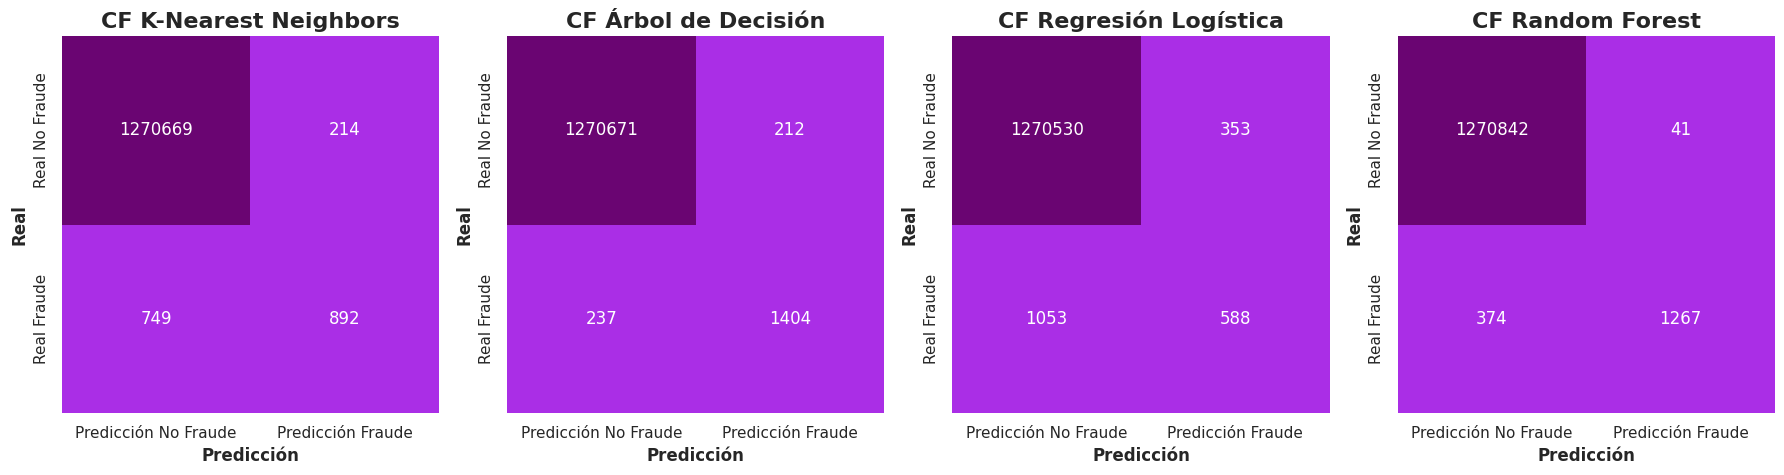

In [ ]:
# Paleta de colores personalizada adecuada para visualización financiera
paleta_personalizada = ['#aa2ee6', '#6a0572']

# Figura para las matrices de confusión
plt.figure(figsize=(18, 18))

# Iterar a través de las matrices de confusión y graficarlas
for i, (etiqueta, matriz_confusion) in enumerate(matrices_confusion.items()):
    plt.subplot(4, 4, i + 1)
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap=paleta_personalizada, cbar=False, square=True,
                xticklabels=['Predicción No Fraude', 'Predicción Fraude'],
                yticklabels=['Real No Fraude', 'Real Fraude'])

    plt.title(f'CF {etiqueta}', fontsize=16, fontweight='bold')
    plt.xlabel('Predicción', fontsize=12, fontweight='bold')
    plt.ylabel('Real', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()



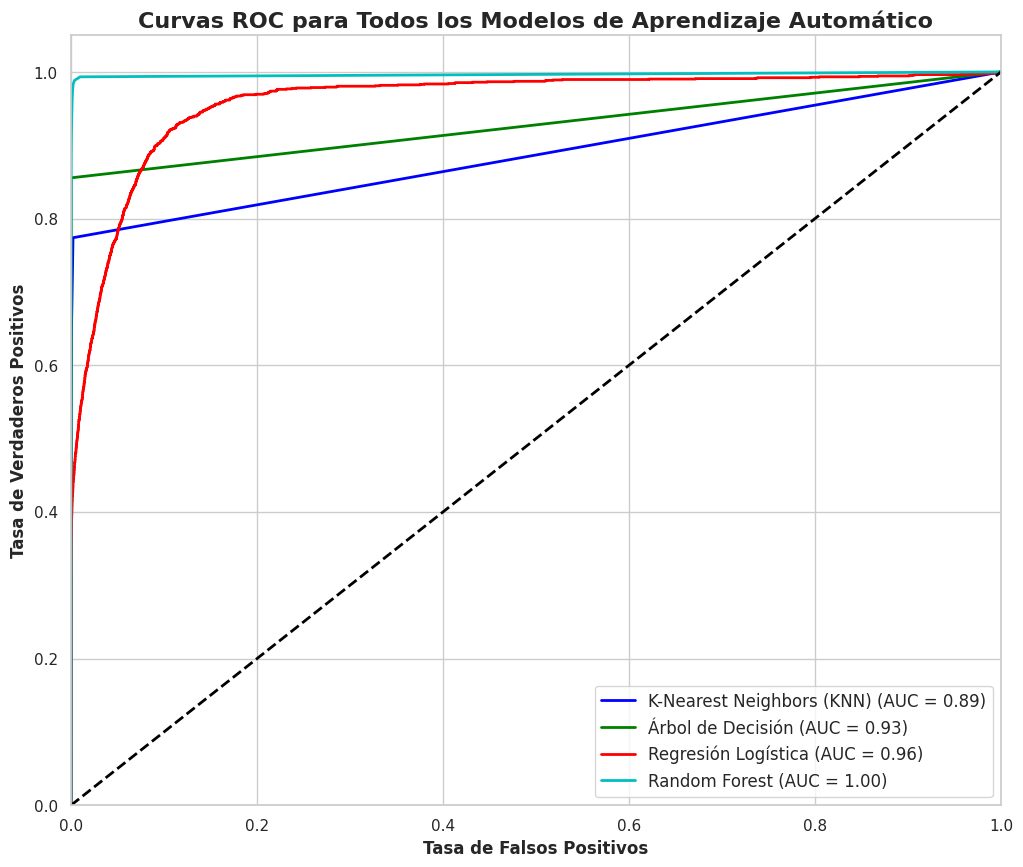

In [ ]:
# Figura para las curvas ROC AUC
plt.figure(figsize=(12, 10))

# Colores para cada curva de modelo
colores = ['b', 'g', 'r', 'c']

# Iterar a través de cada modelo y graficar la curva ROC AUC
for i, (etiqueta, modelo) in enumerate(modelos.items()):
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Graficar las curvas ROC AUC con colores distintos
    plt.plot(fpr, tpr, lw=2, label=f'{etiqueta} (AUC = {roc_auc:.2f})', color=colores[i])
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos', fontsize=12, fontweight='bold')
plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12, fontweight='bold')
plt.title('Curvas ROC para Todos los Modelos de Aprendizaje Automático', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.show()



# Resultados

## AUC es una métrica común utilizada para evaluar el rendimiento de modelos de clasificación binaria, que se utilizan para predecir uno de dos resultados posibles.

**Vecinos más Cercanos (KNN) (AUC = 0.89):**
K-Nearest Neighbors es un algoritmo de aprendizaje automático simple e intuitivo utilizado para tareas de clasificación y regresión. Opera en base al principio de que los puntos de datos similares están cerca unos de otros en el espacio de características.
Un puntaje AUC de 0.89 sugiere que este modelo KNN logró un buen nivel de discriminación, aunque no perfecto, al distinguir entre las dos clases que está prediciendo. Cuanto más cercano sea el puntaje AUC a 1.0, mejor será el rendimiento del modelo.

**Árbol de Decisión (AUC = 0.93):**
Un Árbol de Decisión es una estructura en forma de árbol que se utiliza para tomar decisiones basadas en un conjunto de condiciones. Es un modelo popular para tareas de clasificación y regresión.
Un puntaje AUC de 0.93 indica que el modelo de Árbol de Decisión tiene una fuerte capacidad para diferenciar entre las clases que está prediciendo. Está teniendo un buen desempeño en este contexto.

**Regresión Logística (AUC = 0.96):**
La Regresión Logística es un modelo estadístico utilizado para clasificación binaria. Modela la probabilidad de un resultado binario.
Un puntaje AUC de 0.96 es bastante alto, lo que indica que el modelo de Regresión Logística es muy efectivo para clasificar datos. Es excelente para distinguir entre las dos clases.

**Bosque Aleatorio (AUC = 1.00):**
Random Forest es un método de aprendizaje de conjunto que combina múltiples árboles de decisión para mejorar la precisión predictiva y reducir el sobreajuste.
Un puntaje AUC de 1.00 significa que el modelo de Bosque Aleatorio ha logrado una discriminación perfecta. Puede distinguir perfectamente entre las dos clases en el conjunto de datos, lo que indica un rendimiento extremadamente fuerte.

En resumen, los puntajes AUC reflejan el rendimiento de clasificación de estos modelos. Un puntaje AUC más alto generalmente implica un mejor rendimiento del modelo en términos de distinguir entre las dos clases, y Random Forest, con un AUC de 1.00, destaca por haber logrado una discriminación perfecta en este contexto.

# Conclusión
En este proyecto, se aplicaron varios modelos de aprendizaje automático para predecir transacciones fraudulentas en un conjunto de datos financiero. Se utilizó la AUC como métrica de evaluación para comparar el rendimiento de los modelos.

Se observó que el modelo de Bosque Aleatorio tuvo un rendimiento excepcional, con un AUC de 1.00, lo que indica una capacidad perfecta para distinguir entre transacciones fraudulentas y no fraudulentas. Este resultado sugiere que el modelo de Bosque Aleatorio es altamente efectivo para detectar transacciones fraudulentas en este conjunto de datos.

Por otro lado, la Regresión Logística también tuvo un rendimiento destacado, con un AUC de 0.96, lo que indica una capacidad muy fuerte para clasificar los datos.

En comparación, el modelo de Vecinos más Cercanos (KNN) obtuvo un AUC de 0.89, mientras que el Árbol de Decisión alcanzó un AUC de 0.93, lo que sugiere que ambos modelos tienen un buen rendimiento, pero no tan alto como los modelos de Bosque Aleatorio y Regresión Logística.

En resumen, este proyecto demuestra que los modelos de aprendizaje automático pueden ser efectivos para detectar transacciones fraudulentas en datos financieros. La elección del modelo adecuado dependerá de las necesidades específicas del problema y de la precisión requerida para la aplicación en cuestión.







In [ ]:
!pip freeze > requirements.txt
